<a href="https://colab.research.google.com/github/umeriftikhar1988/smartphones-eda/blob/main/smartphones_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/smartphones.csv')

# Show the first few rows of the data
df.head()


,model,Price,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,Rs.54999,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2?GHz Processor","12?GB RAM, 256?GB inbuilt",5000?mAh Battery with 100W Fast Charging,"6.7 inches, 1440?x?3216?px, 120 Hz Display wit...",50?MP + 48?MP + 32?MP Triple Rear & 16?MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,Rs.19989,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2?GHz Processor","6?GB RAM, 128?GB inbuilt",5000?mAh Battery with 33W Fast Charging,"6.59 inches, 1080?x?2412?px, 120 Hz Display wi...",64?MP + 2?MP + 2?MP Triple Rear & 16?MP Front ...,"Memory Card (Hybrid), upto 1?TB",Android v12
2,Samsung Galaxy A14 5G,Rs.16499,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4?GHz Processor","4?GB RAM, 64?GB inbuilt",5000?mAh Battery with 15W Fast Charging,"6.6 inches, 1080?x?2408?px, 90 Hz Display with...",50?MP + 2?MP + 2?MP Triple Rear & 13?MP Front ...,"Memory Card Supported, upto 1?TB",Android v13
3,Motorola Moto G62 5G,Rs.14999,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2?GHz Processor","6?GB RAM, 128?GB inbuilt",5000?mAh Battery with Fast Charging,"6.55 inches, 1080?x?2400?px, 120 Hz Display wi...",50?MP + 8?MP + 2?MP Triple Rear & 16?MP Front ...,"Memory Card (Hybrid), upto 1?TB",Android v12
4,Realme 10 Pro Plus,Rs.24999,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6?GHz Processor","6?GB RAM, 128?GB inbuilt",5000?mAh Battery with 67W Fast Charging,"6.7 inches, 1080?x?2412?px, 120 Hz Display wit...",108?MP + 8?MP + 2?MP Triple Rear & 16?MP Front...,Memory Card Not Supported,Android v13


# Data Overview and Missing Values

In [ ]:
# Check the basic structure and datatypes of each column
df.info()

# Summary statistics (works best for numerical + categorical insights)
df.describe(include='all')

# Check how many missing values are in each column
print("\n Missing Values Per Column:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   model      1020 non-null   object
 1   Price      1020 non-null   object
 2   sim        1020 non-null   object
 3   processor  1020 non-null   object
 4   ram        1020 non-null   object
 5   battery    1020 non-null   object
 6   display    1020 non-null   object
 7   camera     1019 non-null   object
 8   card       1013 non-null   object
 9   os         1003 non-null   object
dtypes: object(10)
memory usage: 79.8+ KB

 Missing Values Per Column:
model         0
Price         0
sim           0
processor     0
ram           0
battery       0
display       0
camera        1
card          7
os           17
dtype: int64


# Data Cleaning - Price & Missing Values

In [ ]:
# Clean the 'Price' column: remove 'Rs.' and commas, convert to integer
df['Price'] = df['Price'].astype(str).str.replace('Rs.', '', regex=False).str.replace(',', '').astype(int)


# Confirm 'Price' is now numeric
print("Cleaned 'Price' column:")
print(df['Price'].head())

# Handle missing values
# Fill 'camera' and 'card' missing values with 'Unknown'
df['camera'] = df['camera'].fillna('Unknown')
df['card'] = df['card'].fillna('Unknown')

# Drop rows where 'os' is missing (if OS is critical for your analysis)
df.dropna(subset=['os'], inplace=True)

# Recheck missing values after cleaning
print("\n Missing values after cleaning:")
print(df.isnull().sum())


Cleaned 'Price' column:
0    54999
1    19989
2    16499
3    14999
4    24999
Name: Price, dtype: int64

 Missing values after cleaning:
model        0
Price        0
sim          0
processor    0
ram          0
battery      0
display      0
camera       0
card         0
os           0
dtype: int64


# Feature Engineering - Extracting Numeric Features

In [ ]:
# Extract numeric RAM (in GB) from 'ram' column
df['RAM_GB'] = df['ram'].str.extract(r'(\d+)\D*GB', expand=False).astype(float)

# Extract Storage (in GB) from 'ram' column (some values contain it together)
df['Storage_GB'] = df['ram'].str.extract(r'(\d+)\D*GB inbuilt', expand=False).astype(float)

# Extract Battery capacity (in mAh) from 'battery' column
df['Battery_mAh'] = df['battery'].str.extract(r'(\d+)\s*\?*mAh', expand=False).astype(float)

# Extract Charging Power (in W) from 'battery' column
df['Charging_W'] = df['battery'].str.extract(r'(\d+)\s*\?*W', expand=False).astype(float)

# Preview new engineered columns
df[['RAM_GB', 'Storage_GB', 'Battery_mAh', 'Charging_W']].head()


,RAM_GB,Storage_GB,Battery_mAh,Charging_W
0,12.0,256.0,5000.0,100.0
1,6.0,128.0,5000.0,33.0
2,4.0,64.0,5000.0,15.0
3,6.0,128.0,5000.0,NaN
4,6.0,128.0,5000.0,67.0


# Data Visualization - Univariate & Bivariate Analysis

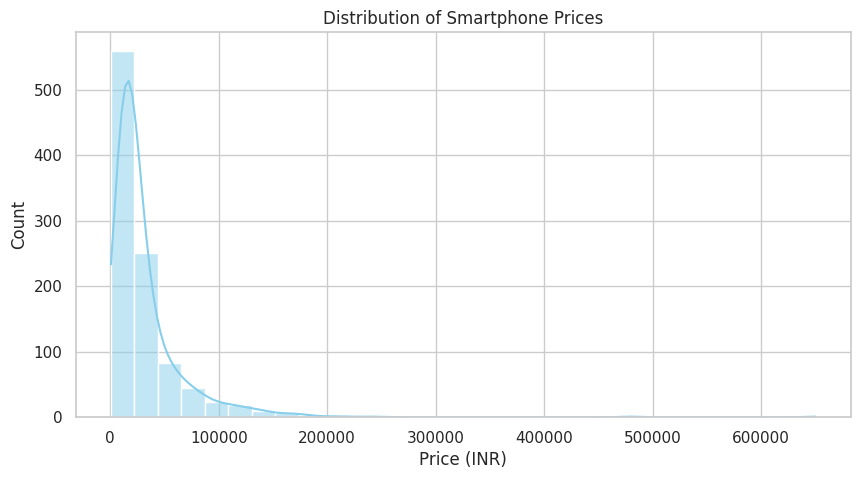

<ipython-input-16-203321182>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RAM_GB', data=df, palette='viridis')


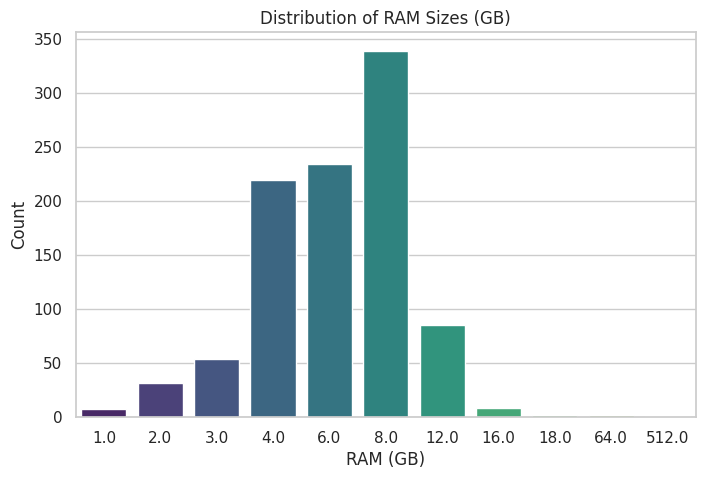

<ipython-input-16-203321182>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='os', data=df, order=df['os'].value_counts().index, palette='coolwarm')


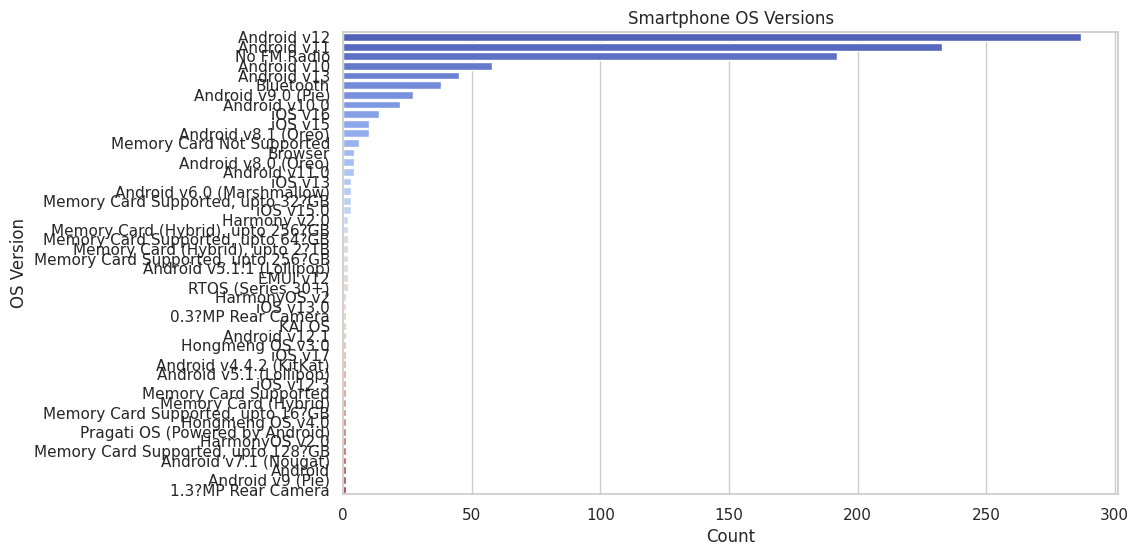

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply clean aesthetic style
sns.set(style="whitegrid")

# Price Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Smartphone Prices")
plt.xlabel("Price (INR)")
plt.ylabel("Count")
plt.show()

# RAM Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='RAM_GB', data=df, palette='viridis')
plt.title("Distribution of RAM Sizes (GB)")
plt.xlabel("RAM (GB)")
plt.ylabel("Count")
plt.show()

# Operating System Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='os', data=df, order=df['os'].value_counts().index, palette='coolwarm')
plt.title("Smartphone OS Versions")
plt.xlabel("Count")
plt.ylabel("OS Version")
plt.show()


# Bivariate Analysis & Correlation Heatmap

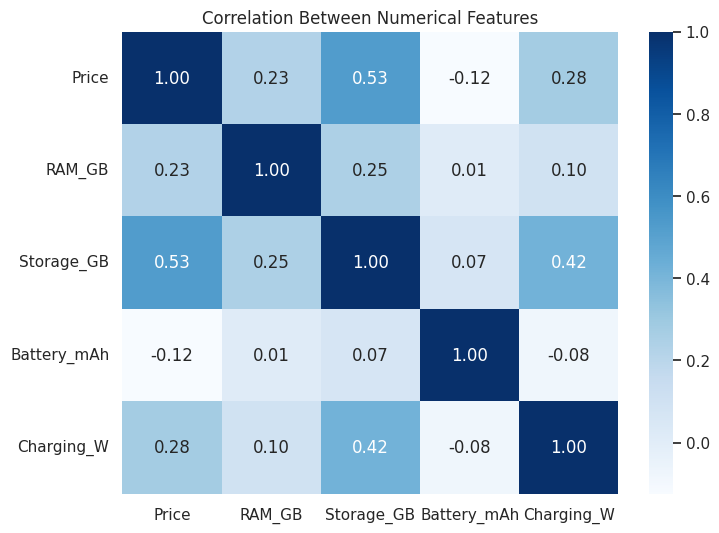

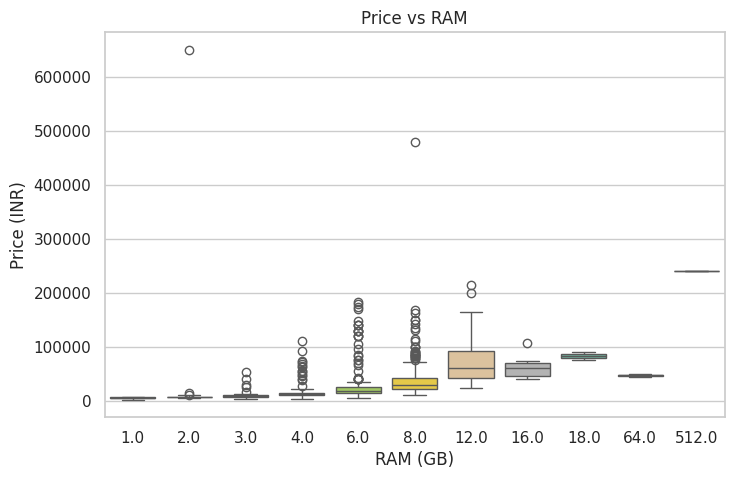

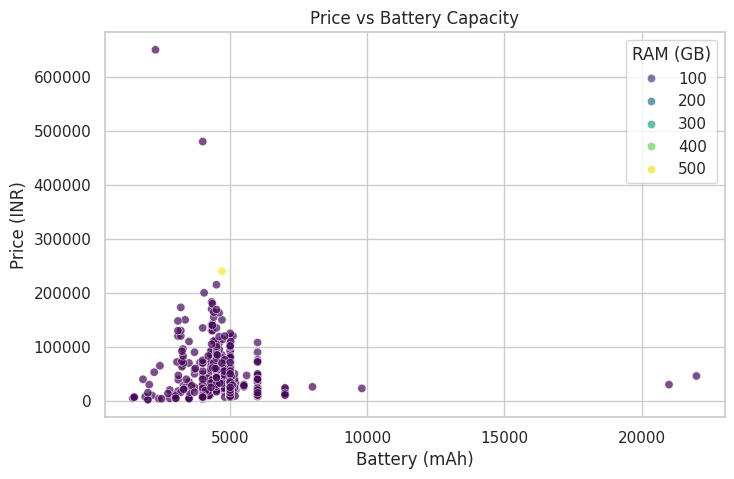

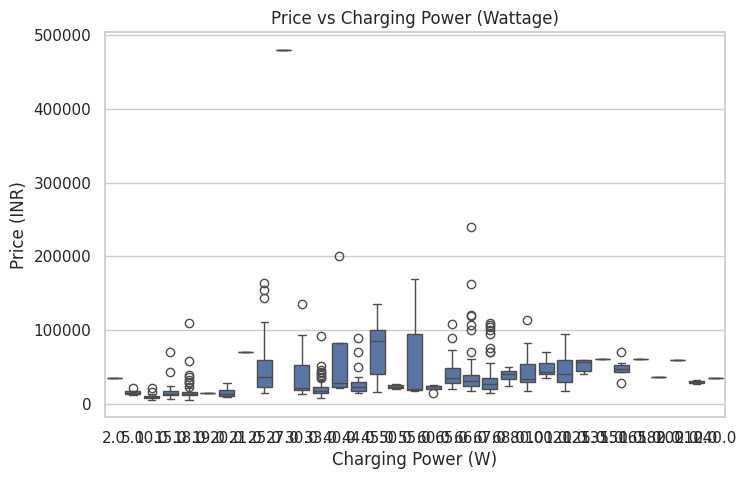

In [ ]:
# Correlation heatmap for numeric features
plt.figure(figsize=(8, 6))
numeric_cols = ['Price', 'RAM_GB', 'Storage_GB', 'Battery_mAh', 'Charging_W']
corr_matrix = df[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Between Numerical Features")
plt.show()

# Price vs RAM
plt.figure(figsize=(8, 5))
sns.boxplot(x='RAM_GB', y='Price', data=df, palette='Set2')
plt.title("Price vs RAM")
plt.xlabel("RAM (GB)")
plt.ylabel("Price (INR)")
plt.show()

# Price vs Battery Capacity
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Battery_mAh', y='Price', data=df, hue='RAM_GB', palette='viridis', alpha=0.7)
plt.title("Price vs Battery Capacity")
plt.xlabel("Battery (mAh)")
plt.ylabel("Price (INR)")
plt.legend(title='RAM (GB)')
plt.show()

# Charging Power vs Price
plt.figure(figsize=(8, 5))
sns.boxplot(x='Charging_W', y='Price', data=df)
plt.title("Price vs Charging Power (Wattage)")
plt.xlabel("Charging Power (W)")
plt.ylabel("Price (INR)")
plt.show()
